#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [21]:
import pandas as pd
df=pd.read_csv("imdb_top_10000.txt",sep='\t' )


In [22]:
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [23]:
df=pd.read_csv("imdb_top_10000.txt",sep='\t',names=['imdbID','title','year','score','votes','runtime','genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [24]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [25]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [30]:
df[df.genres.isna()]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [31]:
df.dropna(subset=['genres'],inplace=True)
df.shape

(9999, 7)

In [32]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

In [ ]:
#5. what was the best movie in the year 1999 based upon the score?

In [ ]:
# longest and shortest runtime

In [ ]:
# display movie titles where its runtime is greater than 100

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [96]:
# REMOVE mins
run_time = [int(r.split(' ')[0]) for r in df.runtime]
df['runtime'] = run_time
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Thriller  Action  Music  ...  Animation  \
0                       Crime|Drama     False   False  False  ...      False   
1                    Crime|Thriller      True   False  False  ...      False   
2            Drama|Mystery|Thriller      True   False  False  ...      False   
3           Action|Adventure|Sci-Fi     False    True  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller      True    True  False  ...      False   

   Fantasy  Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
0    False   False    False  False  False  False      False   False    False  
1    False   False    False  False  False  False      False   False    False  
2    False   False    False  False  False  False      False   False    False  
3    False   False    False  False  False  False       True    True    False  
4    False   False    False  False  False  False       True    True    False  

[5 rows x 31 columns]

In [97]:
# The movie year is repeated in the title and year column. REMOVE YEAR
df['title'] = [t[0:-7] for t in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Thriller  Action  Music  ...  Animation  \
0                       Crime|Drama     False   False  False  ...      False   
1                    Crime|Thriller      True   False  False  ...      False   
2            Drama|Mystery|Thriller      True   False  False  ...      False   
3           Action|Adventure|Sci-Fi     False    True  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller      True    True  False  ...      False   

   Fantasy  Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
0    False   False    False  False  False  False      False   False    False  
1    False   False    False  False  False  False      False   False    False  
2    False   False    False  False  False  False      False   False    False  
3    False   False    False  False  False  False       True    True    False  
4    False   False    False  False  False  False       True    True    False  

[5 rows x 31 columns]

In [69]:
# ATOMIC
import matplotlib.pyplot as plt
%matplotlib inline
genre_set=set()
for genre in df.genres:
    genre_set.update(genre.split('|'))

In [ ]:
len(genre_set)

In [65]:
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  Thriller  Action  Music  ...  Animation  \
0                       Crime|Drama     False   False  False  ...      False   
1                    Crime|Thriller      True   False  False  ...      False   
2            Drama|Mystery|Thriller      True   False  False  ...      False   
3           Action|Adventure|Sci-Fi     False    True  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller      True    True  False  ...      False   

   Fantasy  Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
0    False   False    False  False  False  False      False   False    False  
1    False   False    False  False  False  False      False   False    False  
2    False   False    False  False  False  False      False   False    False  
3    False   False    False  False  False  False       True    True    False  
4    False   False    False  False  False  False       True    True    False  

[5 rows x 31 columns]

In [99]:
small_df = df[['title', 'runtime']]
run_time = small_df['runtime']
print("Longest runtime")
print(run_time.max())
print("Shortest runtime")
print(run_time.min())

Longest runtime
450
Shortest runtime
0


In [102]:
small_df = df[['title', 'runtime']]
result = df[(small_df['runtime'] >= 100)]
result.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Thriller  Action  Music  ...  Animation  \
0                       Crime|Drama     False   False  False  ...      False   
1                    Crime|Thriller      True   False  False  ...      False   
2            Drama|Mystery|Thriller      True   False  False  ...      False   
3           Action|Adventure|Sci-Fi     False    True  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller      True    True  False  ...      False   

   Fantasy  Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
0    False   False    False  False  False  False      False   False    False  
1    False   False    False  False  False  False      False   False    False  
2    False   False    False  False  False  False      False   False    False  
3    False   False    False  False  False  False       True    True    False  
4    False   False    False  False  False  False       True    True    False  

[5 rows x 31 columns]

## 4. EDA

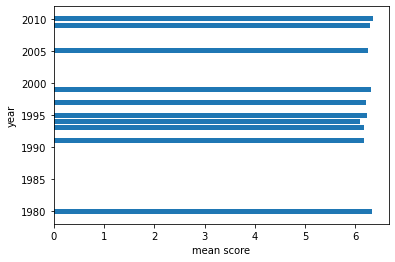

In [109]:
cdf = df.groupby("year",sort=False)
#setting y value from statistics summary
yfirst10 = cdf['score'].mean()[:10]
#x value as categorical
xfirst10 = df.year.unique()[:10]
plt.barh(xfirst10,yfirst10)
plt.xlabel("mean score")
plt.ylabel("year")
plt.show()

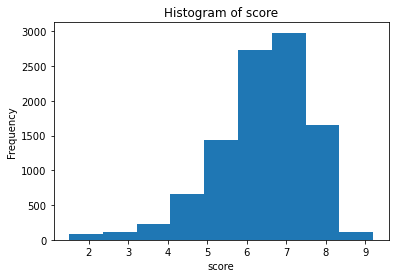

In [110]:
x = df.score
plt.hist(x,bins=9)
plt.title('Histogram of score')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

## 5. Determining Best Movies

In [80]:
movie=df.groupby('year',sort=False)

year_1999=movie.get_group(1999)

bestmovie1999=year_1999[year_1999['score']==year_1999.score.max()]
print(bestmovie1999)

      imdbID              title  year  score   votes    runtime  \
2  tt0137523  Fight Club (1999)  1999    8.8  458173  139 mins.   

                   genres  Thriller  Action  Music  ...  Animation  Fantasy  \
2  Drama|Mystery|Thriller      True   False  False  ...      False    False   

   Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
2   False    False  False  False  False      False   False    False  

[1 rows x 31 columns]


In [88]:
# best movie of 2000 based upon votes
Movie=df.groupby('year',sort=False)
time_2010=Movie.get_group(2010)

Bestmovie=time_2010[time_2010['votes']==time_2010.votes.max()]
print(Bestmovie)

      imdbID             title  year  score   votes    runtime  \
4  tt1375666  Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  Thriller  Action  Music  ...  Animation  \
4  Action|Adventure|Sci-Fi|Thriller      True    True  False  ...      False   

   Fantasy  Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
4    False   False    False  False  False  False       True    True    False  

[1 rows x 31 columns]


## 6. Trends in Popularity of Genres

In [66]:
genredf=df[list(genre_set)] 
genredf.head()

Thriller  Action  Music  Biography  Crime  Horror    War  History  Mystery  \
0     False   False  False      False   True   False  False    False    False   
1      True   False  False      False   True   False  False    False    False   
2      True   False  False      False  False   False  False    False     True   
3     False    True  False      False  False   False  False    False    False   
4      True    True  False      False  False   False  False    False    False   

   Film-Noir  ...  Animation  Fantasy  Comedy  Romance   News  Sport  Adult  \
0      False  ...      False    False   False    False  False  False  False   
1      False  ...      False    False   False    False  False  False  False   
2      False  ...      False    False   False    False  False  False  False   
3      False  ...      False    False   False    False  False  False  False   
4      False  ...      False    False   False    False  False  False  False   

   Adventure  Sci-Fi  Musical  
0      False   False    False  
1      False   False    False  
2      False   False    False  
3       True    True    False  
4       True    True    False  

[5 rows x 24 columns]

In [70]:
genreresult=genredf.sum()
y=genreresult.sort_values(ascending=False)[:10]
x=y.index


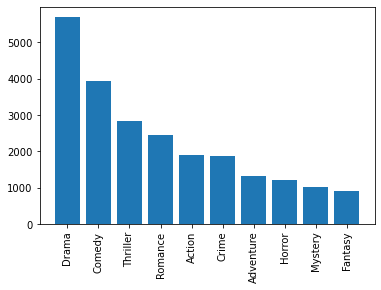

In [79]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  Thriller  Action  Music  ...  Animation  \
0                       Crime|Drama     False   False  False  ...      False   
1                    Crime|Thriller      True   False  False  ...      False   
2            Drama|Mystery|Thriller      True   False  False  ...      False   
3           Action|Adventure|Sci-Fi     False    True  False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller      True    True  False  ...      False   

   Fantasy  Comedy  Romance   News  Sport  Adult  Adventure  Sci-Fi  Musical  
0    False   False    False  False  False  False      False   False    False  
1    False   False    False  False  False  False      False   False    False  
2    False   False    False  False  False  False      False   False    False  
3    False   False    False  False  False  False       True    True    False  
4    False   False    False  False  False  False       True    True    False  

[5 rows x 31 columns]